## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

## Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

In [59]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics

In [60]:
# Set up the data
data = "../data/"
train = "datasets/clean_train.csv"
test = "datasets/test.csv"

In [61]:
#Read in the data
train_df = pd.read_csv(data+train)
test_df = pd.read_csv(data+test)

In [62]:
# Features chosen in EDA and cleaning
features =['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual']
# Set up X-features and our y-target from the train_df to feed into regression models
X = train_df[features]
y_actual = train_df['SalePrice']

In [63]:
# Verify dimensions in X and y represent an equal number of observations in each, n = No. of rows
print('X:        ', X.shape) # X.shape equals (n,p)
print('y_actual: ', y_actual.shape) # y.shape equals (n, null)

X:         (2049, 7)
y_actual:  (2049,)


In [64]:
# Check that everything is copacetic.
X.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
0,2005,1976,725,725.0,475.0,1479,6
1,1997,1996,913,913.0,559.0,2122,7
2,2007,1953,1057,1057.0,246.0,1057,5


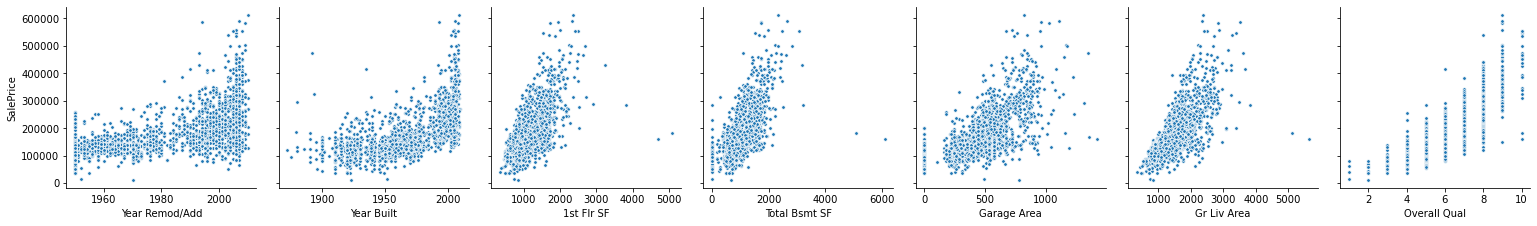

In [65]:
#sns.pairplot(df);
sns.pairplot(train_df, x_vars=features, y_vars=['SalePrice'],height=3,plot_kws={"s": 13});

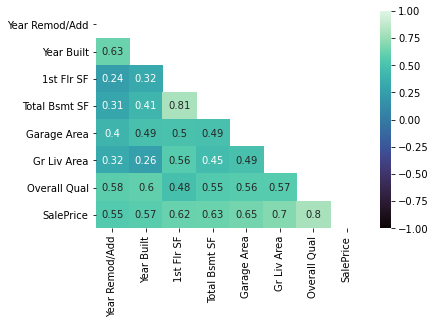

In [66]:
corr = train_df[['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual', 'SalePrice']].corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, cmap = 'mako', annot = True, vmin=-1, vmax=1);

#### Model 1 Features: ['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual']

In [67]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, random_state=42)

In [68]:
#Scale the X-data (convert features into Z-scores = [X-mean(X)] / std(X))
ss = StandardScaler()
ss.fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

#### Model 2 Features: ['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual', 'class']

In [69]:
#Scale the X-data (convert features into Z-scores = [X-mean(X)] / std(X))
ss = StandardScaler()
ss.fit(X)
Z = ss.transform(X)

In [70]:
Z_df = pd.DataFrame(Z)
Z = Z_df.rename(columns={0: "Year Remod/Add",
                            1: "Year Built", 
                            2: "1st Flr SF",
                            3: "Total Bsmt SF",
                            4: "Garage Area",
                            5: "Gr Liv Area",
                            6: "Overall Qual"})

In [71]:
# Check that everything is copacetic
Z.head()

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
0,0.989304,0.141070,-1.109111,-0.741195,0.005715,-0.040900,-0.079763
1,0.608810,0.804184,-0.634924,-0.322849,0.394798,1.244226,0.621675
2,1.084428,-0.621512,-0.271718,-0.002414,-1.055000,-0.884327,-0.781201
3,1.084428,1.135742,-1.061187,-1.500003,-0.341681,-0.110853,-0.781201
4,0.418562,-2.378766,-0.841750,-0.850232,0.047402,-0.108854,-0.079763


In [72]:
#One-hot encode categorical variables.
class_dummy = pd.get_dummies( data=train_df[['class']], columns= [ 'class' ], drop_first=True)
class_dummy

,class_1,class_2
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2044,0,0
2045,0,0
2046,0,0
2047,0,0


In [73]:
# Concatenate scaled-numerical and encoded-categorical data for testing
Z = pd.concat([Z,class_dummy], axis=1)

['Year Remod/Add',
 'Year Built',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Area',
 'Gr Liv Area',
 'Overall Qual',
 'class_1',
 'class_2']

In [ ]:
# create a features list for future reference
features2 = list(Z.columns)
features2

In [74]:
# Check that everything is copacetic
Z.head()

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,class_1,class_2
0,0.989304,0.141070,-1.109111,-0.741195,0.005715,-0.040900,-0.079763,1,0
1,0.608810,0.804184,-0.634924,-0.322849,0.394798,1.244226,0.621675,0,0
2,1.084428,-0.621512,-0.271718,-0.002414,-1.055000,-0.884327,-0.781201,0,0
3,1.084428,1.135742,-1.061187,-1.500003,-0.341681,-0.110853,-0.781201,0,0
4,0.418562,-2.378766,-0.841750,-0.850232,0.047402,-0.108854,-0.079763,0,0


In [75]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train2, Z_test2, y_train2, y_test2 = train_test_split(Z, y_actual, random_state=42)

In [78]:
# Use IPython magic command %store to pass scaled & Test/Train-Split variables to Notebook: 03_Model_Benchmarks for model validation
# Got help from Stack Overflow on sharing variables between notebooks
#<https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks>
%store X_train
%store X_test
%store Z_train
%store Z_test
%store y_train
%store y_test
%store Z_train2
%store Z_test2
%store y_train2
%store y_test2
%store features
%store features2

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'Z_train' (ndarray)
Stored 'Z_test' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'Z_train2' (DataFrame)
Stored 'Z_test2' (DataFrame)
Stored 'y_train2' (Series)
Stored 'y_test2' (Series)
Stored 'features' (list)
Stored 'features2' (list)


In [77]:
#Consider using automated feature selection.